# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

*bear with me, just trying something...*

In [110]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from PIL import Image
import pandas as pd

In [111]:
image = Image.open('test.jpg')
text = pytesseract.image_to_string(image) #result is a string with each column read by row, separated by line break, so split by line break
rows=text.split("\n")
rows = [row.strip() for row in rows if row.strip()]
rows

['StudentID | Age | Tardies',
 '1 17 10',
 'i',
 '=',
 '27',
 '21',
 '36',
 '48',
 '19',
 '26',
 'OloOI NID] Om! BR] win',
 '54',
 'WlOl|A/OI|NI AION',
 '“A',
 'fo}',
 '30']

*didn't work, back to lab :D*

In [112]:
x_values=[17,51,27,21,36,48,19,26,54,30]
y_values=[10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<function matplotlib.pyplot.show(close=None, block=None)>

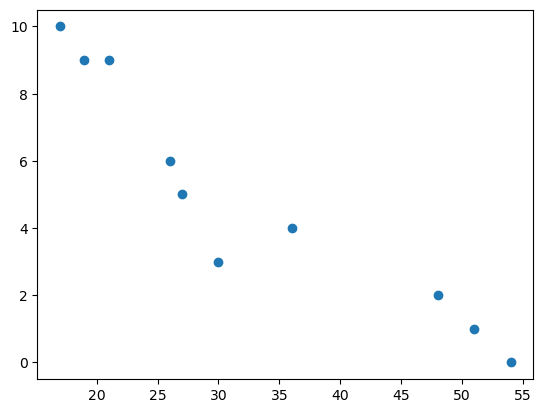

In [113]:
import matplotlib.pyplot as plt
plt.scatter(x=student_data["Age"],y=student_data["Tardies"])
plt.show

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*There is a downward trend: younger students tend to be tardies as well; the higher the age, the lower number of late students. It looks like there is a strong negative correlation between age and number of tardies*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [114]:
#correlation:
from scipy.stats import spearmanr,pearsonr
print(pearsonr(student_data["Age"],student_data["Tardies"])[0])
print(spearmanr(student_data["Age"],student_data["Tardies"])[0])
#almost perfect linear correlation between two variables

#covariance:
import numpy as np
print(np.cov(student_data["Age"],student_data["Tardies"]))
#diagonal values of the covariance matrix prove the negative linear relationship between variables

#difference is that correlation gives us direction and strength of the relationship, while covariance only points at direction

-0.939162688688712
-0.9848069807617047
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [115]:
from sklearn.linear_model import LinearRegression

X=student_data[["Age"]]
y=student_data["Tardies"]
model=LinearRegression()
model.fit(X,y)

#outcome variable is tardies, linear regression as confirmed by correlation indices

LinearRegression()

Plot your regression model on your scatter plot.

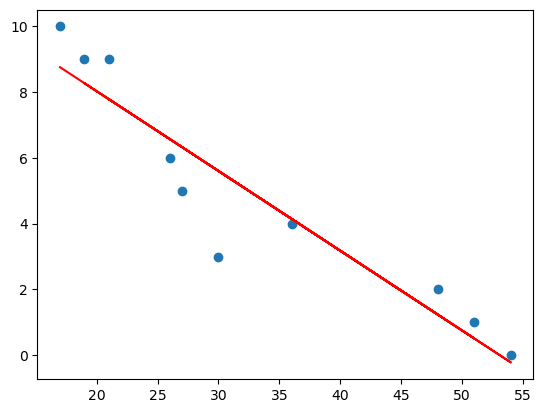

In [116]:
slope = model.coef_
interception = model.intercept_
reg_line=interception + slope*X

plt.plot(X,reg_line, c="red")
plt.scatter(X,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*There is an almost perfect linear correlation between age and number of late students, as proven by scatter plots and correlation analysis. Based on this sample, age is a good predictor of tardiness*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [117]:
vehicles=pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [118]:
vehicle_focus=vehicles[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]]
vehicle_focus.corr(method="pearson")

#Fuel Barrels/Year OR Fuel Cost per Year will be the best variables to predict CO2 emmissions because of strong linear correlation.
#In prediction model, only one of them should be used, as two variables also have a correlation index of more than 0.91
#There is also a strong negative correlation between CO2 emissions and MPG - the higher the miles per galon consumption, the lower the CO2 emissions

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [119]:
#using linear regression because all variables are numeric and continuous 
X=vehicles[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]
y=vehicles["CO2 Emission Grams/Mile"]
model=LinearRegression()
model.fit(X,y)
model.score(X,y)
#score here is R squared

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [120]:
from sklearn.metrics import mean_squared_error
vehicles["pred"]=model.predict(X)
print ("Root of Mean Squared Error: ",np.sqrt(mean_squared_error(y,vehicles["pred"])))
print ("Mean of CO2 Emissions:",y.mean())
print (f"According to the model, CO2 predictions can be off by 16 grams/mile in each case. This represents { round(np.sqrt(mean_squared_error(y,vehicles['pred']))/y.mean()*100,2) }% error compared to the mean value of CO2")

Root of Mean Squared Error:  16.465711496024085
Mean of CO2 Emissions: 475.3163392572124
According to the model, CO2 predictions can be off by 16 grams/mile in each case. This represents 3.46% error compared to the mean value of CO2


*As described above, the most important variables are Fuel Barrels/Year; Fuel Cost per Year and MPG.
Model is highly accurate with a score of 0.98 and about a 3.46% variation in value compared to CO2 mean.*


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [121]:
data=pd.DataFrame({"X":[1,3,4,6,8,9,11,14],
                  "Y":[1,2,4,4,5,7,8,13]})
data.head()


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

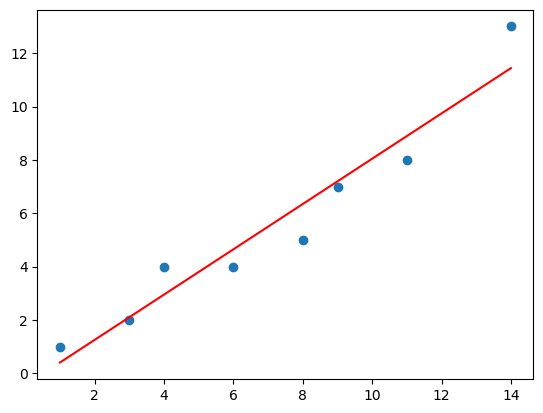

In [122]:
X=data[["X"]]
y=data["Y"]
model=LinearRegression()
model.fit(X,y)
slope = model.coef_
interception = model.intercept_
reg_line=interception+slope*X


plt.plot(X,reg_line, c="red")
plt.scatter(X,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*There is a strong positive correlation between two variables.*

In [123]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data["X"],data["Y"])
print(slope) #how much Y changes as X increases
print(intercept) #mean value when all features are zero
print(r_value) #pearson correlation
print(std_err) 

print("Pearson check:",pearsonr(data["X"],data["Y"])[0])

0.8484848484848485
-0.43939393939393945
0.9652303546573691
0.09380896778286217
Pearson check: 0.9652303546573691


*Strong positive linear correlation confirmed*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [128]:
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print(iqr)
data_clean = data[(data>=(q1-1.5*iqr)) & (data<=(q3+1.5*iqr))]
data_clean

4.5


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [130]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data_clean["X"],data_clean["Y"])
print(slope) #how much Y changes as X increases
print(intercept) #mean value when all features are zero
print(r_value) #pearson correlation
print(std_err) 

0.8484848484848485
-0.43939393939393945
0.9652303546573691
0.09380896778286217


*No change in regression summary -- outlier did not affect much? Let's confirm through comparing plots*

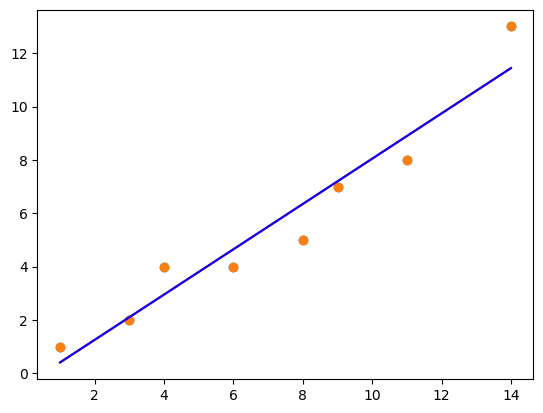

In [133]:
X=data[["X"]]
y=data["Y"]
model=LinearRegression()
model.fit(X,y)
slope = model.coef_
interception = model.intercept_
reg_line=interception+slope*X


X1=data_clean[["X"]]
y1=data_clean["Y"]
model1=LinearRegression()
model1.fit(X1,y1)
slope1 = model1.coef_
interception1 = model1.intercept_
reg_line1=interception1+slope1*X1

plt.plot(X,reg_line, c="red")
plt.scatter(X,y)
plt.plot(X1,reg_line1, c="blue")
plt.scatter(X1,y1)
plt.show()



*Complete overlap of scatter plots and regression lines.*

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*Taking out outliers did not affect the correlations between values*